## July 05 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [4]:
start_time = time.time()
df = pd.read_feather('D:/big-datasets/internship-telkom/tiket_internet_Jan_June_2021.ftr')
print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 16.019833087921143


In [5]:
df.head()

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
0,2021-06-19 12:30:31,2021-06-19 15:54:44,IN101933857,Tidak Bisa Browsing - 2P / 3P Mati Total,[/ardiansyah/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,NUNUKAN,47,6,INETR3M3,3M,Residensial,5.0
1,2021-05-24 14:32:10,None,IN99840378,Tidak Bisa Browsing - Tidak Bisa Koneksi,[/Arlianasari/] Tidak bisa browsing [A_INTERNE...,1,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,BALIKPAPAN,45,6,INETF10M,10M,Prime Cluster,28.0
2,2021-04-04 11:27:17,2021-04-04 17:55:49,IN94701817,Tidak Bisa Browsing - 2P / 3P Mati Total,[/atok/] 2/3P mati total [A_INTERNET][DCS],0,Perbaikan COPPER,KABEL/KONEKTOR RJ11 RUSAK,Ramah,JAMBI,6,1,INETF10M,10M,Residensial,18.0
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688763 entries, 0 to 2688762
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   reportdate        object 
 1   resolvedate       object 
 2   ticketid          object 
 3   gangguan          object 
 4   trouble_headline  object 
 5   is_gamas          object 
 6   task              object 
 7   solution          object 
 8   emosi             object 
 9   datel             object 
 10  cwitel            object 
 11  reg               object 
 12  citem_speed       object 
 13  speed_id          object 
 14  lcat              object 
 15  los_inet          float64
dtypes: float64(1), object(15)
memory usage: 328.2+ MB


In [7]:
df['task'].value_counts()

Perbaikan FIBER                 1072845
                                1053686
Perbaikan COPPER                 486582
Perbaikan Internet Pelanggan      46214
Perbaikan Telepon Pelanggan       25655
                                 ...   
RIZ80152703                           1
TAW2BGESJAKPUS047                     1
a                                     1
GANTI STB                             1
F2CKGA65                              1
Name: task, Length: 63, dtype: int64

1053686 blank space, not None

In [8]:
df['solution'].value_counts()

MODEM/ONT KENA PETIR/MATI/RUSAK                 1099138
                                                 933684
KABEL/KONEKTOR RJ11 RUSAK                        490169
INTERNET - CPE                                    25539
SETTING ULANG MODEM/ONT                           22005
                                                 ...   
TRUNK LOGIC                                           1
Non Numbering SUMUT TIMUR (PEMATANG SIANTAR)          1
CATU DAYA MSAN                                        1
PATCH CORD ODF                                        1
LINK ISP                                              1
Name: solution, Length: 232, dtype: int64

933684 blank space, not None

In [9]:
df['solution'][df['solution'].str.lower() == 'traffic tinggi']

2266012    TRAFFIC TINGGI
Name: solution, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688763 entries, 0 to 2688762
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   reportdate        object 
 1   resolvedate       object 
 2   ticketid          object 
 3   gangguan          object 
 4   trouble_headline  object 
 5   is_gamas          object 
 6   task              object 
 7   solution          object 
 8   emosi             object 
 9   datel             object 
 10  cwitel            object 
 11  reg               object 
 12  citem_speed       object 
 13  speed_id          object 
 14  lcat              object 
 15  los_inet          float64
dtypes: float64(1), object(15)
memory usage: 328.2+ MB


In [11]:
df['gangguan'][df['gangguan'].str.lower().str.contains('lambat')]

3          Bisa Browsing - Lambat
4          Bisa Browsing - Lambat
15         Bisa Browsing - Lambat
16         Bisa Browsing - Lambat
18         Bisa Browsing - Lambat
                    ...          
2688743    Bisa Browsing - Lambat
2688745    Bisa Browsing - Lambat
2688752    Bisa Browsing - Lambat
2688759    Bisa Browsing - Lambat
2688761    Bisa Browsing - Lambat
Name: gangguan, Length: 711828, dtype: object

In [12]:
df_lambat = df[df['gangguan'].str.lower().str.contains('lambat')]

In [13]:
df_lambat.head()

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-26 21:09:49,None,IN102601892,Bisa Browsing - Lambat,[/CAHYONO/] T1 / / COM / cahyono / / inet lam...,0,,,Ramah,KUJANG,19,2,INETF20M,20M,Prime Cluster,109.0
4,2021-06-15 11:02:32,None,IN101590273,Bisa Browsing - Lambat,[/bapak yudha/] T1 / / COM / bapak yudha / / ...,0,,,Marah,BLITAR,35,5,INETF20M,20M,Residensial,140.0
15,2021-04-18 17:07:53,None,IN96810226,Bisa Browsing - Lambat,[/TALITA/] / sosmed / via email / talita.sury...,0,,,Marah,PASAR BARU,18,2,INETF20M,20M,Prime Cluster,13.0
16,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,,,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
18,2021-06-22 07:49:32,None,IN102163894,Bisa Browsing - Lambat,[/BU SITI/] T1/ / com/ bu siti / / ganti pass...,0,,,Ramah,SORONG,60,7,INETF10M,10M,Residensial,12.0


In [14]:
df_lambat['task'] = df_lambat['task'].replace('', np.nan)
df_lambat['solution'] = df_lambat['solution'].replace('', np.nan)

In [15]:
df_lambat = df_lambat.replace({np.nan: None})

In [16]:
df_lambat.isna().sum()

reportdate               0
resolvedate         530092
ticketid                 0
gangguan                 0
trouble_headline         0
is_gamas                 0
task                624363
solution            613576
emosi                    0
datel                    0
cwitel                   0
reg                      0
citem_speed              0
speed_id                 0
lcat                     0
los_inet              1779
dtype: int64

In [17]:
df_lambat.reset_index(drop=True, inplace=True)

In [18]:
df_lambat['los_inet'] = df_lambat['los_inet'].dropna().astype(int)

In [19]:
df_lambat['los_inet'].value_counts(bins=10)

(-0.207, 20.6]    271152
(20.6, 41.2]      198754
(41.2, 61.8]       94475
(61.8, 82.4]       69297
(82.4, 103.0]      29021
(103.0, 123.6]     21245
(123.6, 144.2]     15833
(144.2, 164.8]      8279
(164.8, 185.4]      1852
(185.4, 206.0]       141
Name: los_inet, dtype: int64

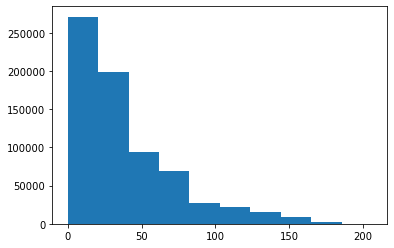

In [20]:
plt.hist(df_lambat['los_inet'], bins=10)
plt.show()

In [21]:
df_lambat[['datel', 'cwitel', 'los_inet']][df_lambat['los_inet'] > 50]

,datel,cwitel,los_inet
0,KUJANG,19,109.0
1,BLITAR,35,140.0
5,MALANG,36,51.0
6,BALIKPAPAN,45,70.0
11,SUMEDANG,23,74.0
...,...,...,...
711812,RIDAR,5,108.0
711813,MAKASSAR,52,73.0
711815,CIBINONG,19,103.0
711821,BALIKPAPAN,45,64.0


In [22]:
df_lambat['datel'].value_counts().head(15)

JAKTIM              40444
JAKUT               33209
JAKSEL              29715
JAKBAR              27821
BEKASI              26578
CIPUTAT             17903
SURABAYA UTARA      17078
MEDAN               15958
JAKPUS              15468
DEPOK               14282
BANDUNG             13882
PASAR BARU          13131
SEMARANG            12271
YOGYAKARTA          12094
SURABAYA SELATAN    12062
Name: datel, dtype: int64

In [23]:
df_lambat['datel'].nunique()

207

In [24]:
df_lambat['cwitel'].nunique()

62

In [25]:
jkt = df_lambat[(df_lambat['datel'] == 'JAKTIM') | 
          (df_lambat['datel'] == 'JAKUT') | 
          (df_lambat['datel'] == 'JAKSEL') |
          (df_lambat['datel'] == 'JAKBAR') |
          (df_lambat['datel'] == 'JAKPUS')]

In [26]:
jkt.shape

(146657, 16)

In [27]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,None,None,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
20,2021-03-01 13:07:38,None,IN91892941,Bisa Browsing - Lambat,[/PAK MIKA/1] T1 / / COM / pak mika / / lamb...,0,None,None,Agak marah,JAKSEL,13,2,INETF20M,20M,Residensial,29.0
33,2021-04-20 11:09:27,None,IN97020725,Bisa Browsing - Lambat,[/WINY/] T1 / / COM / WINY / / Bisa Browsin...,0,None,None,Ramah,JAKBAR,12,2,INETF30M,30M,Residensial,80.0
34,2021-01-24 21:54:26,None,IN88767825,Bisa Browsing - Lambat,[/MOUDY STELLA TITAHALANA/] // socmed // Mou...,0,None,None,Agak marah,JAKSEL,13,2,INETC20M,20M,Prime Cluster,8.0
41,2021-02-12 14:37:24,None,IN90432583,Bisa Browsing - Lambat,[/ANGLIA /] T1 / / com / ANGLIA / / lamba...,0,None,None,Agak marah,JAKSEL,13,2,INETF50M,50M,Residensial,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711799,2021-05-08 18:02:05,2021-05-09 11:27:26,IN98855408,Bisa Browsing - Lambat,[/bp roni/] T1 / / COM / bp roni / / inet tb...,0,Perbaikan COPPER,SHARING PC LAMBAT,Ramah,JAKSEL,13,2,INETF30M,30M,Residensial,48.0
711805,2021-02-02 12:32:55,None,IN89511309,Bisa Browsing - Lambat,[/bpk johari /] T1 / / com / bpk johari / / ...,0,None,None,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,37.0
711806,2021-02-26 11:50:25,None,IN91671386,Bisa Browsing (FISIK) - Lambat,[/DIDI KASIDI/] T1/ / REG / bapa agung / / i...,0,None,None,Marah,JAKUT,15,2,INETF50M,50M,Prime Cluster,4.0
711817,2021-04-16 10:00:43,2021-04-16 11:49:49,IN96552659,Bisa Browsing - Lambat,ttr 3 jam [/@BellSkolah/] // Socmed // @Bell...,1,Perbaikan FIBER,SETTING ULANG MODEM/ONT,Marah,JAKUT,15,2,INETF20M,20M,Apartment,33.0


In [28]:
jkt['los_inet'].value_counts().sort_index()

0.0        59
1.0       647
2.0      1297
3.0      1757
4.0      2251
         ... 
201.0       4
202.0       2
203.0       1
204.0       1
206.0       6
Name: los_inet, Length: 206, dtype: int64

In [29]:
jkt['emosi'].value_counts()

Ramah         82873
Marah         49434
Agak marah    14279
                 71
Name: emosi, dtype: int64

In [30]:
jkt['reportdate']

3         2021-06-01 20:36:59
20        2021-03-01 13:07:38
33        2021-04-20 11:09:27
34        2021-01-24 21:54:26
41        2021-02-12 14:37:24
                 ...         
711799    2021-05-08 18:02:05
711805    2021-02-02 12:32:55
711806    2021-02-26 11:50:25
711817    2021-04-16 10:00:43
711824    2021-04-28 11:51:13
Name: reportdate, Length: 146657, dtype: object

In [31]:
jkt['reportdate'] = pd.to_datetime(jkt['reportdate'], format='%Y-%m-%d %H:%M:%S')

In [32]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,None,None,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
20,2021-03-01 13:07:38,None,IN91892941,Bisa Browsing - Lambat,[/PAK MIKA/1] T1 / / COM / pak mika / / lamb...,0,None,None,Agak marah,JAKSEL,13,2,INETF20M,20M,Residensial,29.0
33,2021-04-20 11:09:27,None,IN97020725,Bisa Browsing - Lambat,[/WINY/] T1 / / COM / WINY / / Bisa Browsin...,0,None,None,Ramah,JAKBAR,12,2,INETF30M,30M,Residensial,80.0
34,2021-01-24 21:54:26,None,IN88767825,Bisa Browsing - Lambat,[/MOUDY STELLA TITAHALANA/] // socmed // Mou...,0,None,None,Agak marah,JAKSEL,13,2,INETC20M,20M,Prime Cluster,8.0
41,2021-02-12 14:37:24,None,IN90432583,Bisa Browsing - Lambat,[/ANGLIA /] T1 / / com / ANGLIA / / lamba...,0,None,None,Agak marah,JAKSEL,13,2,INETF50M,50M,Residensial,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711799,2021-05-08 18:02:05,2021-05-09 11:27:26,IN98855408,Bisa Browsing - Lambat,[/bp roni/] T1 / / COM / bp roni / / inet tb...,0,Perbaikan COPPER,SHARING PC LAMBAT,Ramah,JAKSEL,13,2,INETF30M,30M,Residensial,48.0
711805,2021-02-02 12:32:55,None,IN89511309,Bisa Browsing - Lambat,[/bpk johari /] T1 / / com / bpk johari / / ...,0,None,None,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,37.0
711806,2021-02-26 11:50:25,None,IN91671386,Bisa Browsing (FISIK) - Lambat,[/DIDI KASIDI/] T1/ / REG / bapa agung / / i...,0,None,None,Marah,JAKUT,15,2,INETF50M,50M,Prime Cluster,4.0
711817,2021-04-16 10:00:43,2021-04-16 11:49:49,IN96552659,Bisa Browsing - Lambat,ttr 3 jam [/@BellSkolah/] // Socmed // @Bell...,1,Perbaikan FIBER,SETTING ULANG MODEM/ONT,Marah,JAKUT,15,2,INETF20M,20M,Apartment,33.0


In [33]:
jkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146657 entries, 3 to 711824
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   reportdate        146657 non-null  datetime64[ns]
 1   resolvedate       41993 non-null   object        
 2   ticketid          146657 non-null  object        
 3   gangguan          146657 non-null  object        
 4   trouble_headline  146657 non-null  object        
 5   is_gamas          146657 non-null  object        
 6   task              21111 non-null   object        
 7   solution          24322 non-null   object        
 8   emosi             146657 non-null  object        
 9   datel             146657 non-null  object        
 10  cwitel            146657 non-null  object        
 11  reg               146657 non-null  object        
 12  citem_speed       146657 non-null  object        
 13  speed_id          146657 non-null  object        
 14  lcat

In [34]:
jkt['is_gamas'].value_counts()

0    138435
1      8222
Name: is_gamas, dtype: int64

In [35]:
jkt['emosi'].value_counts()

Ramah         82873
Marah         49434
Agak marah    14279
                 71
Name: emosi, dtype: int64

In [36]:
jkt['emosi'] = jkt['emosi'].replace('', np.nan)

In [37]:
jkt = jkt.replace({np.nan: None})

## July 23 2021

In [38]:
jkt

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
3,2021-06-01 20:36:59,None,IN100493623,Bisa Browsing - Lambat,[/VENUS/] T1/ / COM/ bp venus / / inet lambat...,0,None,None,Ramah,JAKPUS,14,2,INETC40M,40M,Prime Cluster,27.0
20,2021-03-01 13:07:38,None,IN91892941,Bisa Browsing - Lambat,[/PAK MIKA/1] T1 / / COM / pak mika / / lamb...,0,None,None,Agak marah,JAKSEL,13,2,INETF20M,20M,Residensial,29.0
33,2021-04-20 11:09:27,None,IN97020725,Bisa Browsing - Lambat,[/WINY/] T1 / / COM / WINY / / Bisa Browsin...,0,None,None,Ramah,JAKBAR,12,2,INETF30M,30M,Residensial,80.0
34,2021-01-24 21:54:26,None,IN88767825,Bisa Browsing - Lambat,[/MOUDY STELLA TITAHALANA/] // socmed // Mou...,0,None,None,Agak marah,JAKSEL,13,2,INETC20M,20M,Prime Cluster,8.0
41,2021-02-12 14:37:24,None,IN90432583,Bisa Browsing - Lambat,[/ANGLIA /] T1 / / com / ANGLIA / / lamba...,0,None,None,Agak marah,JAKSEL,13,2,INETF50M,50M,Residensial,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711799,2021-05-08 18:02:05,2021-05-09 11:27:26,IN98855408,Bisa Browsing - Lambat,[/bp roni/] T1 / / COM / bp roni / / inet tb...,0,Perbaikan COPPER,SHARING PC LAMBAT,Ramah,JAKSEL,13,2,INETF30M,30M,Residensial,48.0
711805,2021-02-02 12:32:55,None,IN89511309,Bisa Browsing - Lambat,[/bpk johari /] T1 / / com / bpk johari / / ...,0,None,None,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,37.0
711806,2021-02-26 11:50:25,None,IN91671386,Bisa Browsing (FISIK) - Lambat,[/DIDI KASIDI/] T1/ / REG / bapa agung / / i...,0,None,None,Marah,JAKUT,15,2,INETF50M,50M,Prime Cluster,4.0
711817,2021-04-16 10:00:43,2021-04-16 11:49:49,IN96552659,Bisa Browsing - Lambat,ttr 3 jam [/@BellSkolah/] // Socmed // @Bell...,1,Perbaikan FIBER,SETTING ULANG MODEM/ONT,Marah,JAKUT,15,2,INETF20M,20M,Apartment,33.0


In [70]:
jkt['reportdate'] = pd.to_datetime(jkt['reportdate'])

In [73]:
jkt['reportdate']

3        2021-06-01 20:36:59
20       2021-03-01 13:07:38
33       2021-04-20 11:09:27
34       2021-01-24 21:54:26
41       2021-02-12 14:37:24
                 ...        
711799   2021-05-08 18:02:05
711805   2021-02-02 12:32:55
711806   2021-02-26 11:50:25
711817   2021-04-16 10:00:43
711824   2021-04-28 11:51:13
Name: reportdate, Length: 146657, dtype: datetime64[ns]

In [64]:
jkt['resolvedate'].isnull().sum()

104664

In [65]:
146657-104664

41993

In [66]:
jkt['is_gamas'].value_counts()

0    138435
1      8222
Name: is_gamas, dtype: int64

In [68]:
jkt[jkt['is_gamas'] == '1']

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
55,2021-01-28 01:09:02,2021-01-28 02:20:23,IN89037240,Bisa Browsing - Lambat,[/Roymon Archiedinata/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Residensial,32.0
241,2021-01-28 18:20:37,2021-01-28 18:42:09,IN89107259,Bisa Browsing - Lambat,[/NURDIN/] INET LAMBAT [A_INTERNET][DCS],1,None,None,Agak marah,JAKUT,15,2,INETR512K1,512K,Residensial,87.0
259,2021-05-10 14:21:04,None,IN98954625,Bisa Browsing - Lambat,[/Elsa Deviana/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Rumah Kost/Rent & Collective,6.0
357,2021-04-27 01:42:03,2021-04-27 09:01:42,IN97823744,Bisa Browsing - Lambat,[/soimah/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKSEL,13,2,INETF20M,20M,Prime Cluster,3.0
392,2021-03-05 11:22:44,2021-03-05 17:12:23,IN92268974,Bisa Browsing - Lambat,"TTR 3 JAM [/mulyadi,./] T2 / / Gaul Lapul / m...",1,None,OTHERS ACTIVE EQUIPMENT,Ramah,JAKBAR,12,2,INETF20M,20M,Residensial,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711339,2021-01-15 12:45:30,2021-01-15 16:54:35,IN87867747,Bisa Browsing - Lambat,[/Dede /] T2 / / SISPAC / Dede / / LAPUL I...,1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Residensial,45.0
711357,2021-01-15 18:28:24,2021-01-16 10:28:49,IN87907904,Bisa Browsing - Lambat,[/joko tri yono/] Lambat [A_INTERNET][DBS],1,Perbaikan Telepon Pelanggan,INTERNET - CPE,Ramah,JAKTIM,16,2,INETF20M,20M,Bisnis,24.0
711705,2021-05-01 11:08:19,2021-05-01 15:55:27,IN98212816,Bisa Browsing - Lambat,[/KEVIN/] T1 / Â / COM Â / bp KEVIN Â / / LA...,1,None,None,Marah,JAKBAR,12,2,INETF20M,20M,Prime Cluster,5.0
711739,2021-04-29 15:50:58,2021-04-30 14:54:03,IN98071717,Bisa Browsing - Lambat,[/dodik/] LAMBAT [A_INTERNET][DCS],1,None,None,Ramah,JAKSEL,13,2,INET10Q050,10M,Residensial,35.0


In [79]:
jkt['reportdate'][jkt['is_gamas'] == '1'].dt.month.value_counts().sort_index()

1    2032
2     944
3    1278
4    1873
5    1140
6     955
Name: reportdate, dtype: int64

In [82]:
jkt['reportdate'][(jkt['is_gamas'] == '1') & (jkt['reportdate'].dt.month == 1)].dt.day.value_counts()

28    352
15    159
4     150
5     149
7     146
19    128
22    126
6     113
8      55
27     49
18     49
29     47
21     47
13     38
20     36
31     35
16     35
23     35
12     29
11     27
1      25
10     24
14     24
30     23
26     21
2      20
24     20
9      19
3      19
17     19
25     13
Name: reportdate, dtype: int64

In [84]:
jkt[
    (jkt['is_gamas'] == '1') &
    (jkt['reportdate'].dt.month == 1) &
    (jkt['reportdate'].dt.day == 28)
]

,reportdate,resolvedate,ticketid,gangguan,trouble_headline,is_gamas,task,solution,emosi,datel,cwitel,reg,citem_speed,speed_id,lcat,los_inet
55,2021-01-28 01:09:02,2021-01-28 02:20:23,IN89037240,Bisa Browsing - Lambat,[/Roymon Archiedinata/] Lambat [A_INTERNET][DCS],1,None,None,Ramah,JAKPUS,14,2,INETF20M,20M,Residensial,32.0
241,2021-01-28 18:20:37,2021-01-28 18:42:09,IN89107259,Bisa Browsing - Lambat,[/NURDIN/] INET LAMBAT [A_INTERNET][DCS],1,None,None,Agak marah,JAKUT,15,2,INETR512K1,512K,Residensial,87.0
2337,2021-01-28 18:48:02,2021-01-29 10:11:29,IN89108913,Bisa Browsing - Lambat,JTN/ FTTH/ HARYADI [/IBU NONIK /] T1 / / COM...,1,None,INTERNET - JARINGAN LOKAL COPPER,Marah,JAKTIM,16,2,INETF20M,20M,Residensial,32.0
2598,2021-01-28 06:21:40,2021-01-28 08:32:30,IN89046165,Bisa Browsing - Lambat,[/NELA PURWANI SEPTIYANTI /] / Sosmed / Lala?...,1,None,None,Marah,JAKTIM,16,2,INETF20M,20M,Prime Cluster,8.0
2681,2021-01-28 06:12:45,2021-01-28 10:44:42,IN89044020,Bisa Browsing - Lambat,[/heru /] T1 / / COM / bapak heru / / inet t...,1,None,None,Marah,JAKUT,15,2,INETFL10M,10M,Prime Cluster,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696125,2021-01-28 07:57:09,None,IN89050819,Bisa Browsing - Lambat,[ IN89050099 ] [/yansen babao/] Lambat [A_INT...,1,None,None,Ramah,JAKTIM,16,2,INETFL20M,20M,Prime Cluster,29.0
698946,2021-01-28 14:07:49,2021-01-28 14:40:41,IN89085424,Bisa Browsing - Lambat,[/LASTRI/] INET LAMBAT [A_INTERNET][DCS],1,None,None,Agak marah,JAKUT,15,2,INETF20M,20M,Residensial,31.0
701832,2021-01-28 01:26:46,2021-01-28 02:22:02,IN89037548,Bisa Browsing (FISIK) - Lambat,[/Yani/] / Socmed / Arya Putra / / / Lambat...,1,Perbaikan FIBER,MODEM/ONT KENA PETIR/MATI/RUSAK,Marah,JAKTIM,16,2,INETFL10M,10M,Prime Cluster,8.0
710391,2021-01-28 09:59:08,2021-01-28 11:41:32,IN89061491,Bisa Browsing - Lambat,[/bp kusno/] T2 / / Preventive Carring / PAK ...,1,None,INTERNET - JARINGAN LOKAL COPPER,Ramah,JAKUT,15,2,INETF40M,40M,Residensial,61.0


In [88]:
jkt['reportdate'][
    (jkt['is_gamas'] == '1') &
    (jkt['reportdate'].dt.month == 1) &
    (jkt['reportdate'].dt.day == 28)
].dt.hour.value_counts()

7     81
6     70
8     41
10    20
18    19
14    14
15    14
16    13
0     12
13    11
12     9
17     8
11     8
5      7
9      6
1      5
19     5
22     3
20     3
21     1
23     1
4      1
Name: reportdate, dtype: int64

In [89]:
df['gangguan'].value_counts()

Tidak Bisa Browsing - Tidak Bisa Koneksi                974679
Tidak Bisa Browsing - 2P / 3P Mati Total                780570
Bisa Browsing - Lambat                                  667520
Bisa Browsing - Intermitten / Putus-Putus               160373
Bisa Browsing (FISIK) - Lambat                           44308
Bisa Browsing (FISIK) - Intermitten / Putus-Putus        21423
Bisa Browsing - Gangguan Game Online                     17322
Bisa Browsing - Tidak Bisa ke Website Tertentu           17040
Bisa Browsing - Gangguan IP Publik                        3720
Bisa Browsing - Tidak Bisa Email                           844
Bisa Browsing - Push Advertising                           370
Berhasil login, tetapi tidak bisa browsing                 301
Tidak Bisa Browsing                                        210
Tidak Bisa Browsing - Gangguan Pasca PSB < 30Hr             59
Bisa Browsing                                               15
Tidak bisa browsing                                    

In [91]:
df['datel'][df['datel'].str.lower().str.contains('jak')].value_counts()

JAKTIM    170047
JAKUT     102684
JAKSEL     95941
JAKBAR     82086
JAKPUS     47634
Name: datel, dtype: int64

In [92]:
jkt = df[df['datel'].str.lower().str.contains('jak')]

In [94]:
jkt.shape

(498392, 16)

In [96]:
jkt['reportdate'] = pd.to_datetime(jkt['reportdate'])

In [109]:
jkt['reportdate'][
    (jkt['is_gamas'] == '1') &
    (jkt['reportdate'].dt.month == 1)
].dt.day.value_counts()

28    1881
31     764
5      726
6      676
19     670
4      659
7      555
22     496
21     460
15     449
8      412
20     409
29     317
27     305
13     257
23     247
18     229
26     227
25     221
14     218
30     215
16     211
12     206
11     193
1      135
24     135
17     132
9      123
10     116
3      112
2      100
Name: reportdate, dtype: int64

In [108]:
jkt['trouble_headline'].sample(10).to_list()

['[/parlin julpriadi.s/] Intermiten [A_INTERNET][DCS]',
 '[/ibu rita/] T1 /  / COM / ibu rita /  / inet lambat , sudah edu gamas /  [A_INTERNET][DCS]',
 '[/DEKY PRAKOSO/]  / SOSMED / Deky Prakoso (Email) /  /  / lambat / fcr yes  [A_INTERNET][DCS]',
 '[/DANDI ARHAM RAMDHANI SE U/PT.JAWA INDIE MOTOR/] Tidak bisa browsing [A_INTERNET][DCS]',
 '[/Wisnu aji putra/]  / sosmed / agyustinams /  /  / TBB / fcr yes [A_INTERNET][DCS]',
 '[/bp UDIN/] T1 /  / com /  bp UDIN   /   / inet sdh normal  ref IN100276710  /    [A_INTERNET][DCS]',
 '[/ibu febry/] T1 /  / com / ibu febry /  / 2p matot los dan ganti remote iptv / BOK / [A_INTERNET][DCS]',
 '[/ANANG SAFRUDIN/] T1/  / COM / bp anang /  / 2p matot /gamas / edukasi /  [A_INTERNET][DCS]',
 '[/ADITIYA PRAPTANTO/] T1 /  / COM  / bapak aditya /  / gamas /    [A_INTERNET][DCS]',
 '[/ayu /] T1 /  / COM / ayu /  / inet tbc / gamas /  [A_INTERNET][DCS]']